Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficTyp

C:\Users\Sufaija_Avthal\AppData\Local\Temp\ipykernel_2484\1841954210.py:37: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.std())
C:\Users\Sufaija_Avthal\AppData\Local\Temp\ipykernel_2484\1841954210.py:42: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


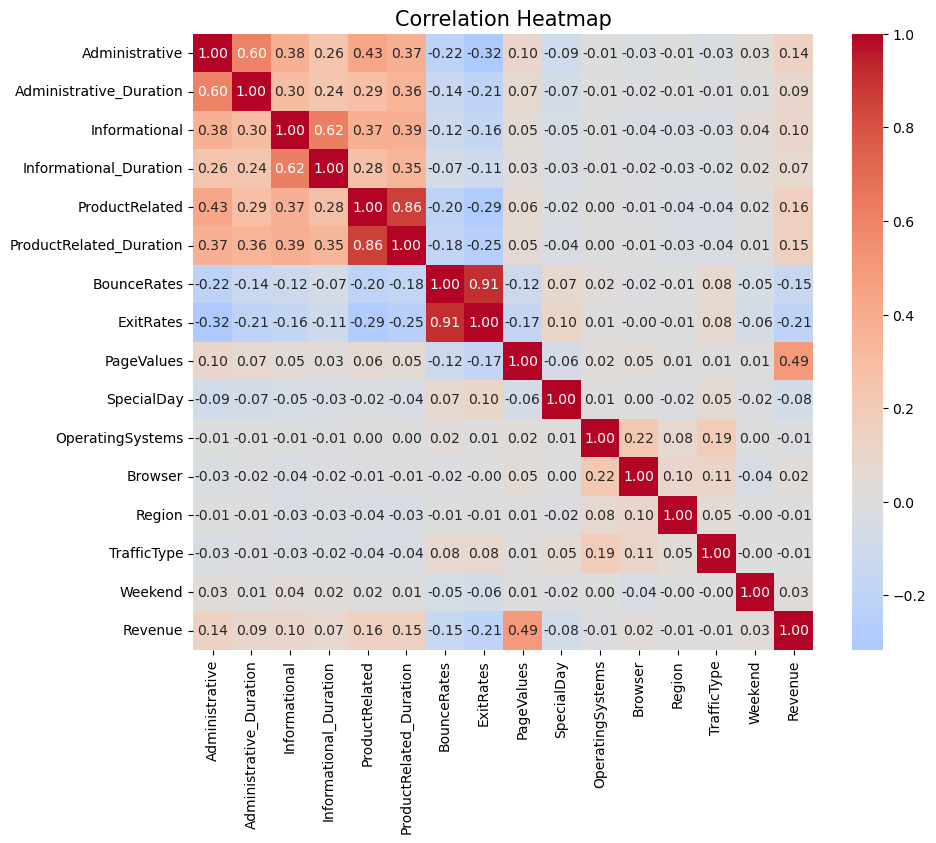

C:\Users\Sufaija_Avthal\AppData\Local\Temp\ipykernel_2484\1841954210.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_features['Month'] = label_encoder_month.fit_transform(categorical_features['Month'])
C:\Users\Sufaija_Avthal\AppData\Local\Temp\ipykernel_2484\1841954210.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_features['VisitorType'] = label_encoder_visitor_type.fit_transform(categorical_features['VisitorType'])


       Administrative  Administrative_Duration  Informational  \
0            0.000000                 0.000000            0.0   
1            0.000000                 0.000000            0.0   
2            0.000000                 0.000000            0.0   
3            0.000000                 0.000000            0.0   
4            0.000000                 0.000000            0.0   
...               ...                      ...            ...   
12325        0.111111                 0.042663            0.0   
12326        0.000000                 0.000000            0.0   
12327        0.000000                 0.000000            0.0   
12328        0.148148                 0.022067            0.0   
12329        0.000000                 0.000000            0.0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0        0.001418                 0.000000   
1                         0.0        0.002837                 0.001000 

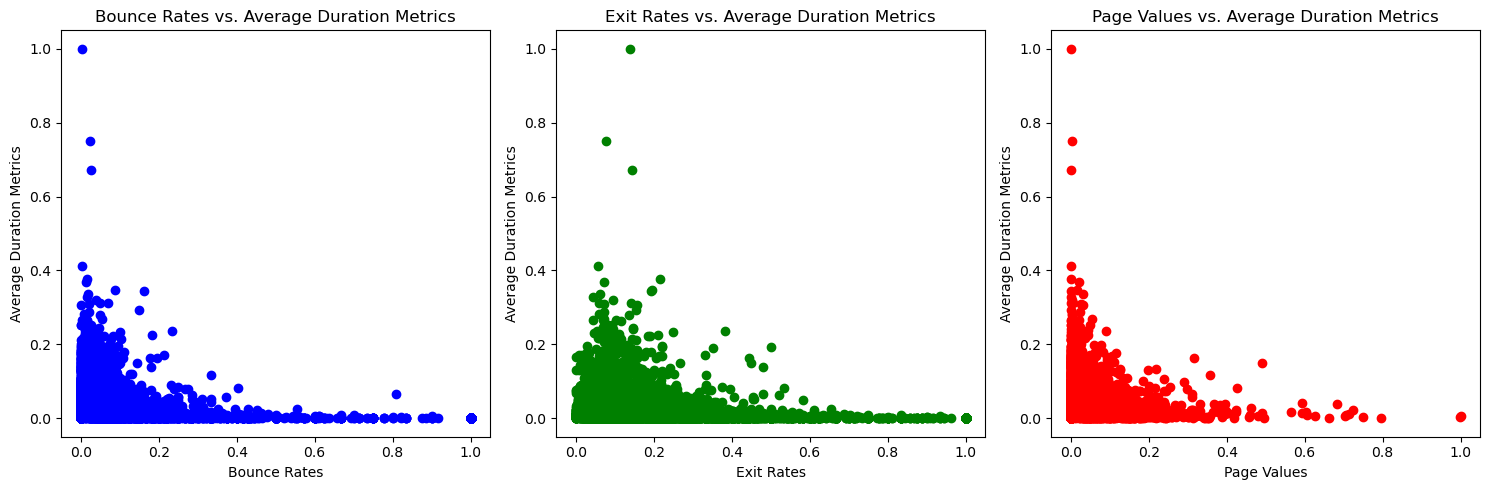

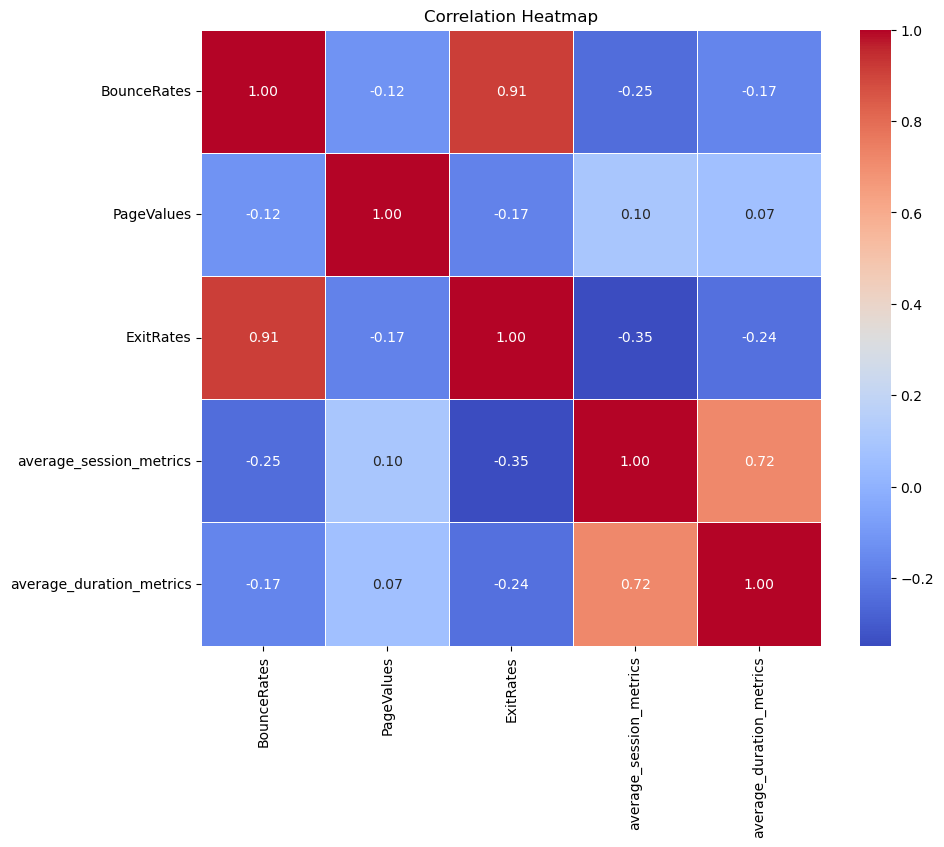

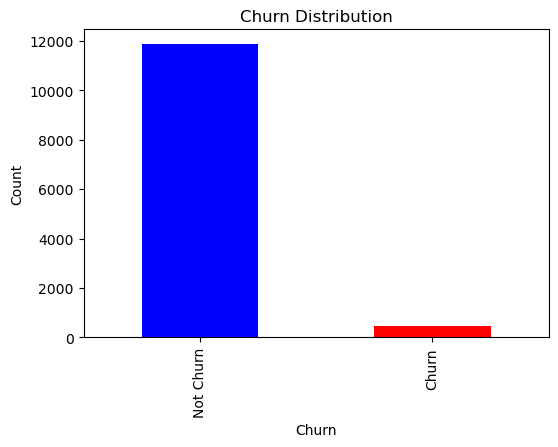

SMOTE Over-sampling:
Not Churn    11863
Churn         9490
Name: ChurnPrediction, dtype: int64


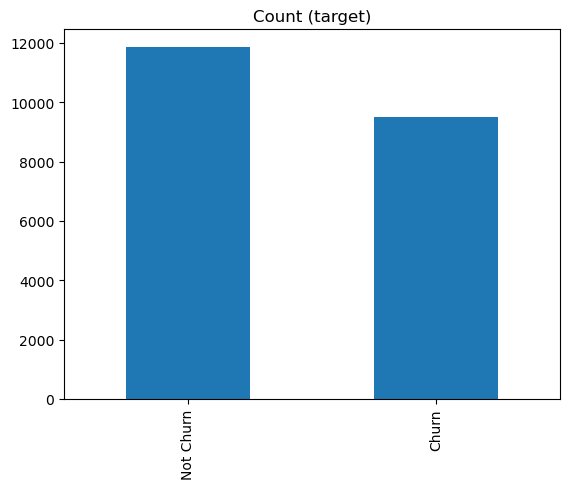

Accuracy: 0.990400374619527
Confusion Matrix:
[[1878    6]
 [  35 2352]]
Classification Report:
              precision    recall  f1-score   support

       Churn       0.98      1.00      0.99      1884
   Not Churn       1.00      0.99      0.99      2387

    accuracy                           0.99      4271
   macro avg       0.99      0.99      0.99      4271
weighted avg       0.99      0.99      0.99      4271

Cross-validation scores:
[0.99203934 0.99086865 0.99133692 0.98782201 0.98711944]
Mean Accuracy: 0.9898372719012872


In [1]:
# import all required libaries

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


# Read the dataset from the shared folder 
data = pd.read_csv(r"C:\Users\Sufaija_Avthal\OneDrive - Coventry University\7150 PROJECT\online_shoppers_intention.csv") 

# DATA PRE_PROCESSING

# Display basic information about the DataFrame
print("Basic Info:")
print(data.info())

# Check for null values
print("\nNull Values:")
print(data.isnull().sum())

# Check for missing values
print("\nMissing Values:")
print(data.isna().sum())

# Check for duplicates
print("\nDuplicates:")
print(data.duplicated().sum())

# Summary statistics including mean, median, min, max, and standard deviation
print("\nSummary Statistics:")
print(data.describe())

# Standard deviation
print("\nStandard Deviation:")
print(data.std())


# Drawing the correlation matrix:

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Heatmap', fontsize=15)
plt.show()


# Create a separate DataFrame for numerical features from the dataframe data
numerical_features = data[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                           'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']]

# Normalize the numerical features using MinMaxScaler
scaler = MinMaxScaler()
numerical_features_normalized = pd.DataFrame(scaler.fit_transform(numerical_features),
                                             columns=numerical_features.columns)

# Create a separate DataFrame for categorical features
categorical_features = data[['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']]

# Convert "Month" column using Label Encoding
label_encoder_month = LabelEncoder()
categorical_features['Month'] = label_encoder_month.fit_transform(categorical_features['Month'])

# Convert "VisitorType" column using Label Encoding
label_encoder_visitor_type = LabelEncoder()
categorical_features['VisitorType'] = label_encoder_visitor_type.fit_transform(categorical_features['VisitorType'])

# Convert remaining categorical features using One-hot encoding
categorical_features_encoded = pd.get_dummies(categorical_features)

# Combine the normalized numerical features and the encoded categorical features back into one DataFrame
normalized_data = pd.concat([numerical_features_normalized, categorical_features_encoded], axis=1)

# Calculate and add new columnsfor the two new features
normalized_data['average_session_metrics'] = normalized_data[['Administrative', 'Informational', 'ProductRelated']].mean(axis=1)
normalized_data['average_duration_metrics'] = normalized_data[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].mean(axis=1)

# Display the updated DataFrame
print(normalized_data)

# Exploratory DATA ANALYSIS 

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: 'BounceRates' vs. 'average_duration_metrics'
axes[0].scatter(normalized_data['BounceRates'], normalized_data['average_duration_metrics'], c='blue', marker='o')
axes[0].set_xlabel('Bounce Rates')
axes[0].set_ylabel('Average Duration Metrics')
axes[0].set_title('Bounce Rates vs. Average Duration Metrics')

# Plot 2: 'ExitRates' vs. 'average_duration_metrics'
axes[1].scatter(normalized_data['ExitRates'], normalized_data['average_duration_metrics'], c='green', marker='o')
axes[1].set_xlabel('Exit Rates')
axes[1].set_ylabel('Average Duration Metrics')
axes[1].set_title('Exit Rates vs. Average Duration Metrics')

# Plot 3: 'PageValues' vs. 'average_duration_metrics'
axes[2].scatter(normalized_data['PageValues'], normalized_data['average_duration_metrics'], c='red', marker='o')
axes[2].set_xlabel('Page Values')
axes[2].set_ylabel('Average Duration Metrics')
axes[2].set_title('Page Values vs. Average Duration Metrics')

# Display plots
plt.tight_layout()
plt.show()


# Draw new correlation Matrix : 
correlation_matrix2 = normalized_data[['BounceRates', 'PageValues', 'ExitRates', 'average_session_metrics', 'average_duration_metrics']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()






# Define the threshold for churn prediction (This threshold should be adjusted based on business strategy)
churn_threshold = 0.2

# Create a new column 'ChurnPrediction' based on the threshold condition
normalized_data['ChurnPrediction'] = normalized_data.apply(lambda row: 'Not Churn' if (row['average_session_metrics'] < churn_threshold and row['average_duration_metrics'] < churn_threshold) else 'Churn', axis=1)


# Count the occurrences of 'Churn' values
churn_counts = normalized_data['ChurnPrediction'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
churn_counts.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.show()


# APPlying SMOTE Over sampling 

X1 = normalized_data.drop(columns=['ChurnPrediction'])
y1 = normalized_data['ChurnPrediction']
smote = SMOTE(random_state=42)
smote = SMOTE(sampling_strategy=0.80)
X1_smote, y1_smote = smote.fit_resample(X1, y1)
df_test_smote = pd.DataFrame(X1_smote, columns=X1.columns)
df_test_smote['ChurnPrediction'] = y1_smote

# Print the class distribution after SMOTE
print('SMOTE Over-sampling:')
print(df_test_smote['ChurnPrediction'].value_counts())

# Plot the class distribution after SMOTE
df_test_smote['ChurnPrediction'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()



In [19]:

# Applying Machine learning algorthims

import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df_test_smote.drop(columns=['ChurnPrediction'])
y = df_test_smote['ChurnPrediction']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
rf_accuracy = accuracy_score(y_test, y_pred)
conf_matrix1 = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {rf_accuracy}')
print('Confusion Matrix:')
print(conf_matrix1)
print('Classification Report:')
print(classification_rep)

# Perform cross-validation of model's performance
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)

# Display cross-validation scores
print("Cross-validation scores:")
print(cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores)}")


Accuracy: 0.9960196675251698
Confusion Matrix:
[[1883    1]
 [  16 2371]]
Classification Report:
              precision    recall  f1-score   support

       Churn       0.99      1.00      1.00      1884
   Not Churn       1.00      0.99      1.00      2387

    accuracy                           1.00      4271
   macro avg       1.00      1.00      1.00      4271
weighted avg       1.00      1.00      1.00      4271

Cross-validation scores:
[0.99672208 0.9962538  0.99508312 0.99578454 0.9941452 ]
Mean Accuracy: 0.9955977489928536


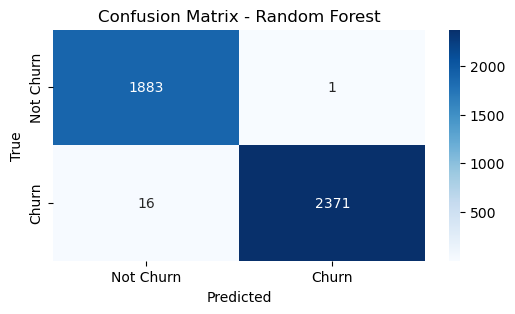

In [22]:
# Random Forest - Plotting confusion matrix as a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()

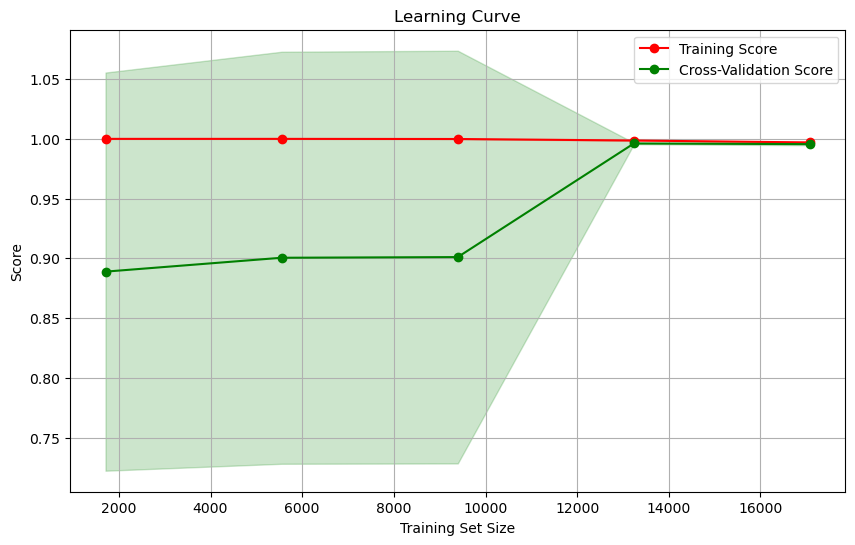

In [23]:
from sklearn.model_selection import train_test_split, learning_curve

# Calculate the learning curve scores
train_sizes, train_scores, test_scores = learning_curve(
    rf_classifier, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, random_state=42)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color='g')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [24]:
# Support Vector Machine MOdel: 

from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9906345118239288
Classification Report:
              precision    recall  f1-score   support

       Churn       0.98      1.00      0.99      1884
   Not Churn       1.00      0.98      0.99      2387

    accuracy                           0.99      4271
   macro avg       0.99      0.99      0.99      4271
weighted avg       0.99      0.99      0.99      4271

Confusion Matrix:
[[1880    4]
 [  36 2351]]


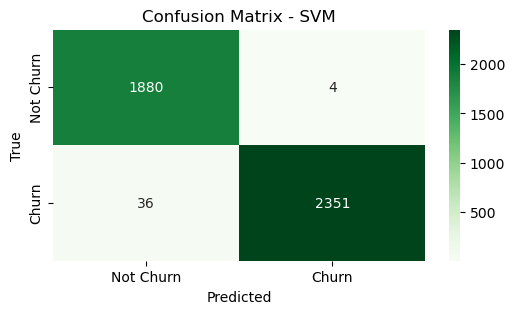

In [25]:
# Confusion Matrix for Support Vector Machine

conf_matrix3 = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix3, annot=True, fmt="d", cmap="Greens", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM')
plt.show()

In [26]:
# Logistic Regression Model 

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Evaluate the model
lr_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", lr_accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

C:\Users\Sufaija_Avthal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9873565909623039
Classification Report:
              precision    recall  f1-score   support

       Churn       0.97      1.00      0.99      1884
   Not Churn       1.00      0.98      0.99      2387

    accuracy                           0.99      4271
   macro avg       0.99      0.99      0.99      4271
weighted avg       0.99      0.99      0.99      4271

Confusion Matrix:
[[1881    3]
 [  51 2336]]


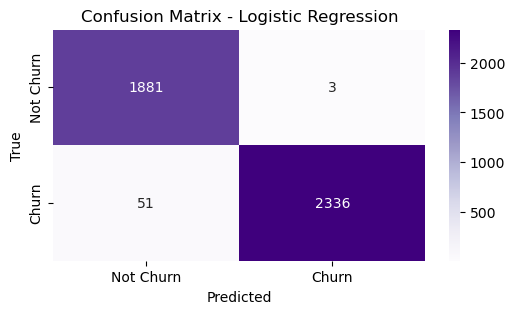

In [27]:
# Confusion Matrix for Logistic Regression

conf_matrix2 = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Purples", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [30]:
import warnings

# Suppress DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)



# Perform k-fold cross-validation (e.g., k=5)
k_fold = 5
svm_cv_scores = cross_val_score(svm_model, X, y, cv=k_fold, scoring='accuracy')
rf_cv_scores = cross_val_score(rf_classifier, X, y, cv=k_fold, scoring='accuracy')
lr_cv_scores = cross_val_score(lr_model, X, y, cv=k_fold, scoring='accuracy')

# Calculate mean and standard deviation of cross-validation scores
svm_mean_accuracy = np.mean(svm_cv_scores)
svm_std_accuracy = np.std(svm_cv_scores)
rf_mean_accuracy = np.mean(rf_cv_scores)
rf_std_accuracy = np.std(rf_cv_scores)
lr_mean_accuracy = np.mean(lr_cv_scores)
lr_std_accuracy = np.std(lr_cv_scores)

# Create a table to display the results
results_table = pd.DataFrame({
    'Model': [ 'Random Forest','SVM', 'Logistic Regression'],
    'Accuracy': [rf_accuracy,svm_accuracy, lr_accuracy],
    'Mean CV Accuracy': [rf_mean_accuracy, svm_mean_accuracy, lr_mean_accuracy],
    'Std Dev CV Accuracy': [rf_std_accuracy,svm_std_accuracy, lr_std_accuracy]
})

print(results_table)

C:\Users\Sufaija_Avthal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sufaija_Avthal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

                 Model  Accuracy  Mean CV Accuracy  Std Dev CV Accuracy
0        Random Forest  0.996020          0.995598             0.000906
1                  SVM  0.990635          0.989416             0.001811
2  Logistic Regression  0.987357          0.987308             0.002905


C:\Users\Sufaija_Avthal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
